In [66]:
import numpy as np
import pandas as pd
import email.utils as utils 
import time
import datetime

In [83]:
df = pd.read_csv('scrubbed.csv')
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


C:\Users\joep\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [84]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


**First I am going to change the datetime column to a datetime dtype, since it seems to just be an object**
I discovered that the hours and minutes were making it difficult for me to convert the column into datetime, due to the 00:00 - 23:59 format. So I decided to make the hours and minutes its own column and convert them separtately, then put them back together. Not the most elegant, but just a creative solution to convert with what I know.  

In [85]:
df = df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66516 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              66516 non-null  object 
 1   city                  66516 non-null  object 
 2   state                 66516 non-null  object 
 3   country               66516 non-null  object 
 4   shape                 66516 non-null  object 
 5   duration (seconds)    66516 non-null  object 
 6   duration (hours/min)  66516 non-null  object 
 7   comments              66516 non-null  object 
 8   date posted           66516 non-null  object 
 9   latitude              66516 non-null  object 
 10  longitude             66516 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.1+ MB


In [86]:
last_5 = df['datetime'].str[-5:]
df.insert(1, 'time', last_5) ## creates new column to separate time
df['datetime'] = df['datetime'].str[:-5]
df.head()
## removes time from datetime column

,datetime,time,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949,20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,10/10/1956,21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960,20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961,19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
7,10/10/1965,23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333


In [87]:
df['datetime'] = df['datetime'].apply(lambda x: pd.Timestamp(x).strftime('%m/%d/%Y'))

In [93]:
df['duration (seconds)'].describe()

count    6.651600e+04
mean     6.572997e+03
std      5.108910e+05
min      1.000000e-02
25%      3.000000e+01
50%      1.800000e+02
75%      6.000000e+02
max      8.280000e+07
Name: duration (seconds), dtype: float64

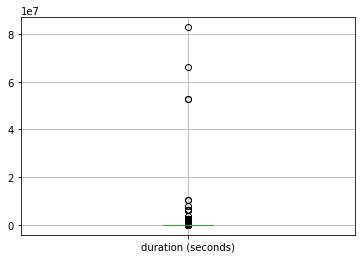

In [91]:
df['duration (seconds)'] = df['duration (seconds)'].astype('float')

for i in col:
    if 
df.boxplot(column='duration (seconds)', return_type='axes')


,time,state,country,shape,datetime,duration (seconds)
0,20:30,tx,us,cylinder,NaN,NaN
3,21:00,tx,us,circle,NaN,NaN
4,20:00,hi,us,light,NaN,NaN
5,19:00,tn,us,sphere,NaN,NaN
7,23:45,ct,us,disk,NaN,NaN
...,...,...,...,...,...,...
80327,21:15,tn,us,light,09/09/2013,600.0
80328,22:00,id,us,circle,09/09/2013,1200.0
80329,22:00,ca,us,other,09/09/2013,1200.0
80330,22:20,va,us,circle,09/09/2013,5.0


In [82]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66516 entries, 0 to 80331
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   datetime            66516 non-null  object
 1   time                66516 non-null  object
 2   state               66516 non-null  object
 3   country             66516 non-null  object
 4   shape               66516 non-null  object
 5   duration (seconds)  66516 non-null  object
dtypes: object(6)
memory usage: 6.1+ MB


In [59]:
round(df['shape'].value_counts()/len(df)*100, 2)

light        21.24
triangle     10.25
circle        9.63
fireball      8.06
unknown       7.18
other         7.07
sphere        6.84
disk          6.49
oval          4.75
formation     3.14
cigar         2.58
changing      2.49
flash         1.69
rectangle     1.68
cylinder      1.62
diamond       1.46
chevron       1.28
teardrop      0.92
egg           0.92
cone          0.39
cross         0.30
delta         0.01
round         0.00
crescent      0.00
hexagon       0.00
flare         0.00
changed       0.00
pyramid       0.00
Name: shape, dtype: float64

In [ ]:
solids = df['shape'] == 'triangle', 'circle', 'sphere', 'disk', 'cigar', 'rectangle', 'cylinder', 'diamond', 'chevron', 'teardrop', 'egg', 'cone', 'cross', 

In [40]:
df['datetime'] = df['datetime'].apply(lambda x: pd.Timestamp(x).strftime('%m/%d/%Y'))

In [41]:
df.country.unique()
## United States, Canada, Australia, and Great Britain 

array(['us', 'ca', 'au', 'gb'], dtype=object)

In [42]:
df.country.value_counts()

us    63553
ca     2942
gb       11
au       10
Name: country, dtype: int64

In [43]:
us_df = df.loc[df['country'] == 'us']

In [44]:
round(us_df.state.value_counts()/len(us_df) * 100, 2) 

ca    13.66
fl     5.91
wa     5.83
tx     5.35
ny     4.59
il     3.85
az     3.72
pa     3.65
oh     3.54
mi     2.80
nc     2.71
or     2.62
mo     2.25
co     2.18
in     2.00
va     1.96
ma     1.95
nj     1.94
ga     1.94
wi     1.90
tn     1.72
mn     1.57
sc     1.55
ct     1.36
ky     1.33
md     1.29
nv     1.22
ok     1.12
nm     1.09
ia     1.05
al     0.99
ut     0.96
ks     0.94
ar     0.91
la     0.86
me     0.86
id     0.80
nh     0.76
mt     0.72
wv     0.69
ne     0.59
ms     0.58
ak     0.49
hi     0.40
vt     0.40
ri     0.35
sd     0.28
wy     0.27
de     0.26
nd     0.19
pr     0.04
dc     0.01
Name: state, dtype: float64

In [45]:
ca_df = us_df.loc[us_df['state'] == 'ca']

In [517]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])

KeyError: "None of [Index(['circle', 'oval', 'disk', 'changing', 'changing', 'fireball', 'circle',\n       'circle', 'changing', 'oval',\n       ...\n       'light', 'circle', 'fireball', 'unknown', 'light', 'formation',\n       'chevron', 'circle', 'light', 'other'],\n      dtype='object', length=8683)] are in the [index]"

In [476]:
fifties = pd.date_range(start='1/1/1950', end='12/31/1959')
sixties = pd.date_range(start='1/1/1960', end='12/31/1969')
seventies = pd.date_range(start='1/1/1970', end='12/31/1979')
eighties = pd.date_range(start='1/1/1980', end='12/31/1989')
nineties = pd.date_range(start='1/1/1990', end='12/31/1999')
aughts = pd.date_range(start='1/1/2000', end='12/31/2009')
ten_to_thirteen = pd.date_range(start='1/1/2010', end='12/31/2013')


In [487]:
ca_df['duration (seconds)'] = ca_df['duration (seconds)'].astype('float')
max_time = ca_df['duration (seconds)'].max()
min_time = ca_df['duration (seconds)'].min()
print(max_time, min_time)
ca_df['duration (seconds)'].describe()

10526400.0 0.1


<ipython-input-487-e9ba222b764a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_df['duration (seconds)'] = ca_df['duration (seconds)'].astype('float')


count    8.683000e+03
mean     2.863707e+03
std      1.146611e+05
min      1.000000e-01
25%      3.000000e+01
50%      1.800000e+02
75%      6.000000e+02
max      1.052640e+07
Name: duration (seconds), dtype: float64

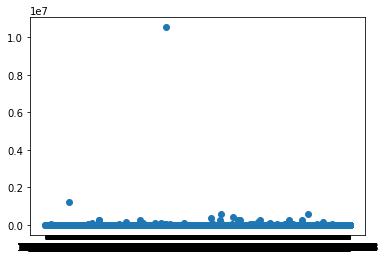

In [492]:
import matplotlib.pyplot as plt

x = ca_df['datetime']
y = ca_df['duration (seconds)']
np.clip(y, min_time, max_time)

plt.scatter(x, y, marker='o');
plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
decade = ['fifties', 'sixties', 'seventies', 'eighties', 'nineties']
sightings = []
ax.bar(dacade, sightings)
plt.show()

In [377]:
df['time'] = df['time'].replace(['24:'], '00:')


In [379]:
df.time.str.contains('24:').count()

66516

In [293]:
lines = []
for i in range(len(df)):
    if df.str.contains('24:'):
        lines.append()
lines

AttributeError: 'DataFrame' object has no attribute 'str'

In [294]:

for line in lines:
    # Convert a 24 hour to 0 hour
    #if line[-5:-3].str.contains('24'):
    (date, time) = line.split()
    time = time[:-5] + '00' + time[-3:]
    date = datetime.datetime.strptime(date, '%m/%d/%Y') + datetime.timedelta(days=1)
        #print('CHANGED  : ' + date.strftime('%m/%d/%Y') + ' ' + time)
    #else:
        #print('UNCHANGED: ' + line)

In [312]:
clean_df.datetime.str.contains('24:').count()

66516

In [235]:
d = df['datetime']

def change_dt(d):
    for i in d:
        if d.str.contains('24:'):
            d.replace(['24:'], '00:')
        new_col = d.apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y %H:%M'))
    return(new_col)
change_dt(df)
#df['datetime'] = df['datetime'].replace(['24:'], '00:')
#df.loc[df['datetime'] == '24:'].count()

AttributeError: 'DataFrame' object has no attribute 'str'

In [223]:
#last_5 = df['datetime'].str[-5:]
#df.insert(1, 'new-col', last_5)

In [224]:
#df.head()

In [225]:
#df['datetime'] = df['datetime'].str[:-5]
#df.head()

In [226]:
df['datetime'] = df['datetime'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y %H:%M'))

ValueError: could not convert string to Timestamp

In [182]:
df['datetime'] = pd.to_datetime(df['datetime'], format = '%d/%m/%Y %H:%M')

In [216]:
#hr_format = '24:'
#new_hr = '00:'
#def hr_change(df):
#    col = df['new-col']
#    for i in col:
#        if i in col == hr_format:
#            col.replace([hr_format], new_hr)
#    return(col)
#hr_change(df)


df['new-col'] = df['new-col'].replace(['24:'], '00:')
df.loc[df['new-col'] == '24:00'].count()



datetime                694
new-col                 694
city                    694
state                   583
country                 557
shape                   653
duration (seconds)      694
duration (hours/min)    694
comments                694
date posted             694
latitude                694
longitude               694
dtype: int64

In [211]:
clock = df.sort_values(by=['new-col'], ascending = False)
clock

,datetime,new-col,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
53798,1975-06-06,24:00,la paz (bolivia),NaN,NaN,sphere,360,6 min,Sorry&#44but my inglis is not good to write.Bu...,8/5/2001,-16.5,-68.150000
63138,2003-07-06,24:00,undisclosed,NaN,NaN,unknown,180,3 minutes,HBCCUFO CANADIAN REPORT: Pictures Of An Unkno...,8/28/2003,41.213673,-74.494364
22250,2004-12-04,24:00,papillion,ne,us,other,3,3 seconds,At 9:30 pm a whiteish blue light swiftly flew ...,12/14/2004,41.1544444,-96.041944
1824,1983-10-15,24:00,california valley,ca,us,disk,600,5-10 min,Sighting&#44 Hynek class CE_II California vall...,4/18/2012,35.3200000,-120.005833
15620,2003-01-17,24:00,jacksonville,ar,us,circle,60,1 min,big bright object rising off the ground.,7/8/2004,34.8661111,-92.110000
...,...,...,...,...,...,...,...,...,...,...,...,...
42965,1999-05-18,00:00,san antonio,tx,us,fireball,15,15 sec.,Witness sees orange fireball w/ long yellow ta...,5/24/1999,29.4238889,-98.493333
41225,2004-05-10,00:00,edmonton (canada),ab,ca,unknown,40,30-40 seconds,Looking for what i saw i found this site on th...,6/4/2004,53.55,-113.500000
52702,1969-06-30,00:00,dorood (iran),NaN,NaN,sphere,900,15 min.,While riding home at night my family and I sa...,2/14/2008,33.495503,49.063174
75774,2005-09-19,00:00,fort mcmurray (earth) (canada),ab,ca,unknown,120,couple mins,Strange light moving around the moon observed ...,10/11/2005,56.7333,-111.383333


0        20:30
1        21:00
2        17:00
3        21:00
4        20:00
         ...  
80327    21:15
80328    22:00
80329    22:00
80330    22:20
80331    23:00
Name: new-col, Length: 80332, dtype: object

In [186]:
df.loc[df['new-col'] == '24:00'].count

<bound method DataFrame.count of         datetime new-col                              city state country  \
388   2006-10-11   24:00                              rome    ny      us   
693   2001-10-01   24:00  chulucanas-piura la vieja (peru)   NaN     NaN   
962   2012-10-01   24:00                              novi    mi      us   
1067  2003-10-12   24:00              salatiga (indonesia)   NaN     NaN   
1221  2013-10-12   24:00                        cincinnati    oh      us   
...          ...     ...                               ...   ...     ...   
79136 2005-09-04   24:00                         boonville    nc      us   
79137 2005-09-04   24:00                     redondo beach    ca      us   
79740 2002-09-07   24:00                        portsmouth    oh      us   
79759 2004-09-07   24:00                          montrose    co      us   
79942 2003-09-08   24:00                      cedar rapids    ia      us   

          shape duration (seconds) duration (hours/min

In [191]:
df['new-col'] = df['new-col'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%H:%M'))

TypeError: an integer is required (got type str)

In [9]:
from datetime import datetime
import itertools


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M')